In [1]:
import pandas as pd
from pandas import DataFrame

#import data from csv

vaccination = pd.read_csv("data/covid-vaccination-policy.csv")
travel = pd.read_csv("data/international-travel-covid-4.csv")
stay_home = pd.read_csv("data/stay-at-home-covid.csv")

face_cover = pd.read_csv("data/face-covering-policies-covid.csv")
owid = pd.read_csv("data/owid-covid-data.csv")


#Series with g20 members according to wikipedia + spain
g20_members = pd.Series(["Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", "India", "Indonesia", "Italy", "Japan", "South Korea", "Mexico", "Russia", "Saudi Arabia", "South Africa", "Turkey", "United Kingdom", "United States", "Spain", "European Union"])

#filter data array for locations that match g20 countries
g20_data = owid[owid["location"].isin(g20_members)].reset_index(drop=True)
g20_data = g20_data.loc[:, g20_data.columns.intersection(["location", "date", "new_cases"])]
#cleaned data
g20_data

,location,date,new_cases
0,Argentina,2020-01-01,NaN
1,Argentina,2020-01-02,NaN
2,Argentina,2020-01-03,NaN
3,Argentina,2020-01-04,NaN
4,Argentina,2020-01-05,NaN
...,...,...,...
10129,United States,2021-05-23,12853.0
10130,United States,2021-05-24,25925.0
10131,United States,2021-05-25,22756.0
10132,United States,2021-05-26,24052.0


### FaceCover

In [2]:
g20_face_cover = face_cover[face_cover["Entity"].isin(g20_members)].reset_index(drop=True)

In [3]:
phases = []

for country in g20_members:
    df = g20_face_cover[g20_face_cover["Entity"] == country].reset_index(drop=True)
    level = 0
    for index, row in df.iterrows():
        if row["facial_coverings"] != level:
            phases.append([country, row["Day"], row["facial_coverings"]])
            level = row["facial_coverings"]
                           
    
face_cover_phases = DataFrame(phases, columns=["country","date","level_changes"]).dropna(how="all").reset_index(drop=True)
face_cover_phases["date"] = pd.to_datetime(face_cover_phases["date"], yearfirst=True)
face_cover_phases

,country,date,level_changes
0,Argentina,2020-04-14,3
1,Australia,2020-07-13,1
2,Australia,2020-07-30,4
3,Australia,2020-11-22,2
4,Australia,2021-01-08,4
...,...,...,...
63,United States,2020-04-06,3
64,United States,2020-07-01,4
65,Spain,2020-05-04,2
66,Spain,2020-05-21,3


### Vaccine

In [4]:
#TODO
g20_vacc = vaccination[vaccination["Entity"].isin(g20_members)].reset_index(drop=True)

phases = []

for country in g20_members:
    df = g20_vacc[g20_vacc["Entity"] == country].reset_index(drop=True)
    level = 0
    for index, row in df.iterrows():
        if row["vaccination_policy"] != level:
            phases.append([country, row["Day"], row["vaccination_policy"]])
            level = row["vaccination_policy"]
                           
    
vaccination_phases = DataFrame(phases, columns=["country","date","level_changes"]).dropna(how="all").reset_index(drop=True)
vaccination_phases["date"] = pd.to_datetime(vaccination_phases["date"], yearfirst=True)
vaccination_phases


### Travel Restriction

In [7]:
g20_travel = travel[travel["Entity"].isin(g20_members)].reset_index(drop=True)

In [8]:
phasesx = []

for country in g20_members:
    df = g20_travel[g20_travel["Entity"] == country].reset_index(drop=True)
    level1 = 0
    for index, row in df.iterrows():
        if row["international_travel_controls"] != level1:
            phasesx.append([country, row["Day"], row["international_travel_controls"]])
            level1 = row["international_travel_controls"]
                           
    
travel_phases = DataFrame(phasesx, columns=["country","date","level_changes"]).dropna(how="all").reset_index(drop=True)
travel_phases["date"] = pd.to_datetime(travel_phases["date"], yearfirst=True)
travel_phases

,country,date,level_changes
0,Argentina,2020-03-11,2
1,Argentina,2020-03-16,4
2,Argentina,2020-11-06,3
3,Argentina,2021-05-04,4
4,Australia,2020-02-01,3
...,...,...,...
82,United States,2020-02-02,2
83,United States,2020-03-02,3
84,Spain,2020-03-10,3
85,Spain,2020-03-17,4


### Stay at home

In [9]:
#TODO

## Plot

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

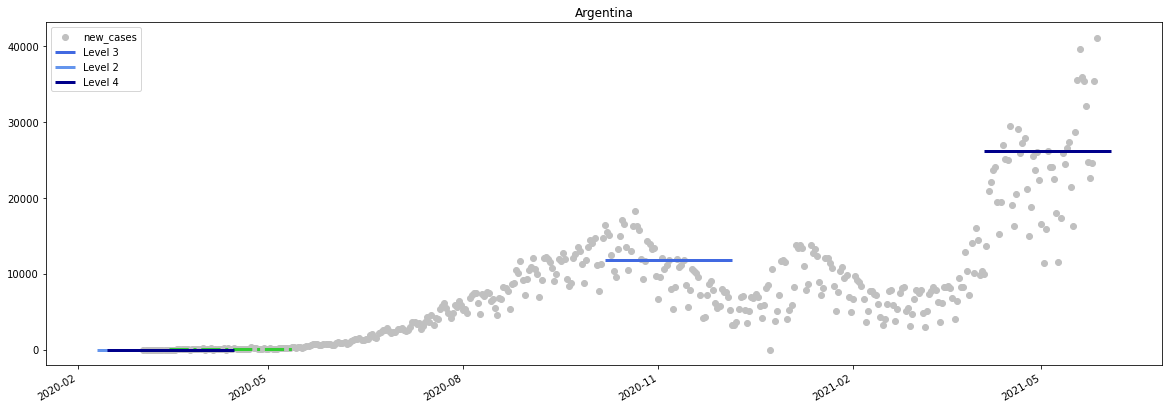

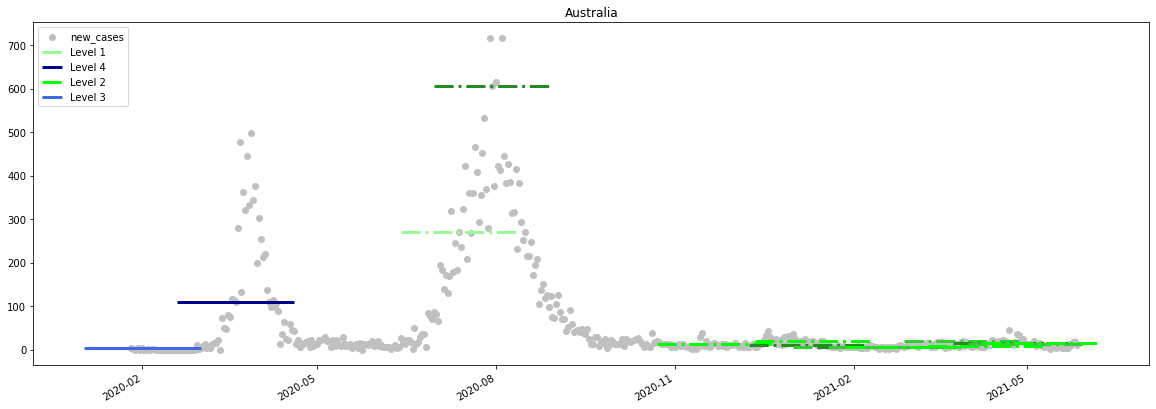

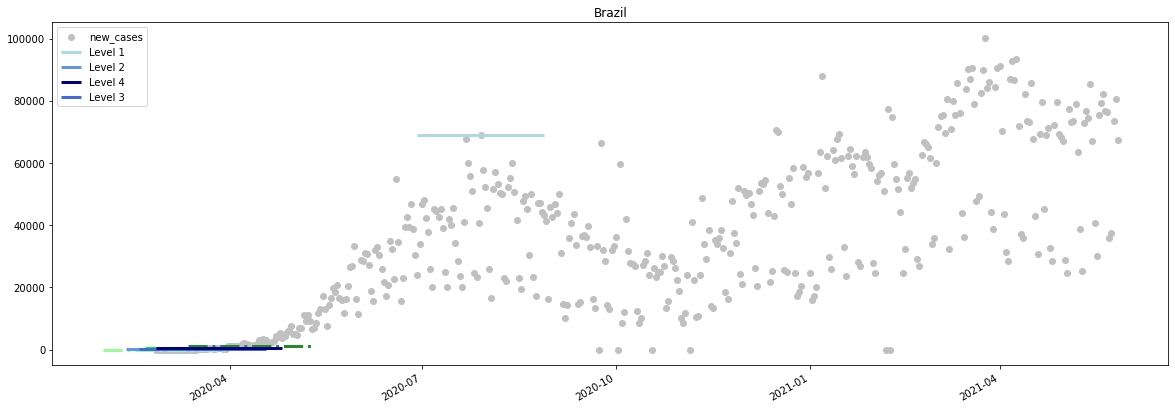

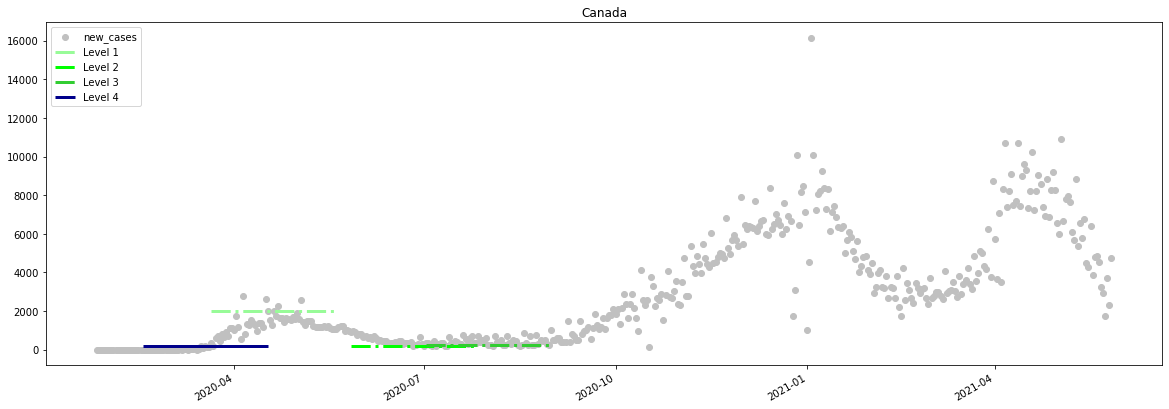

C:\Users\ching\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


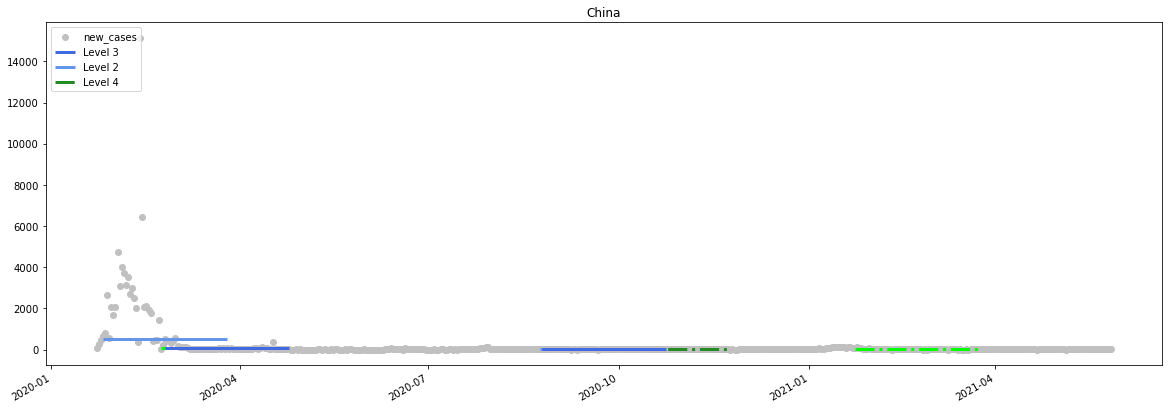

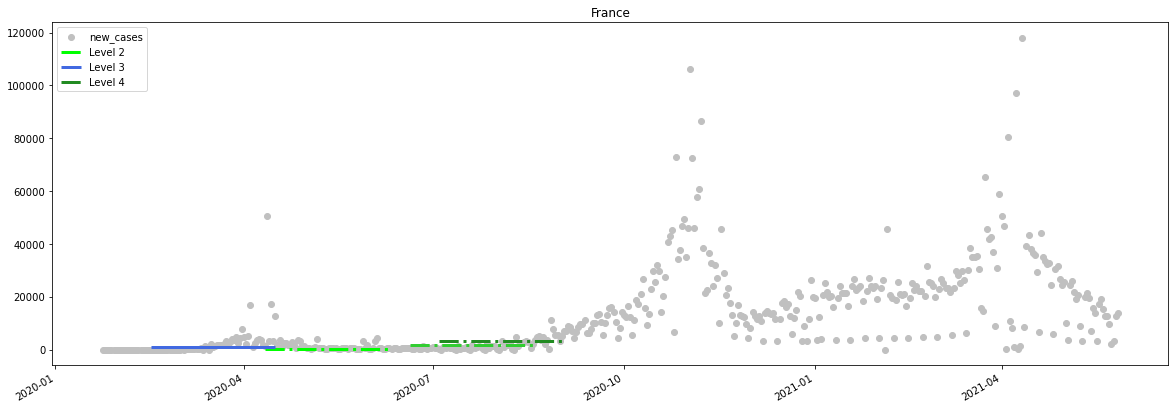

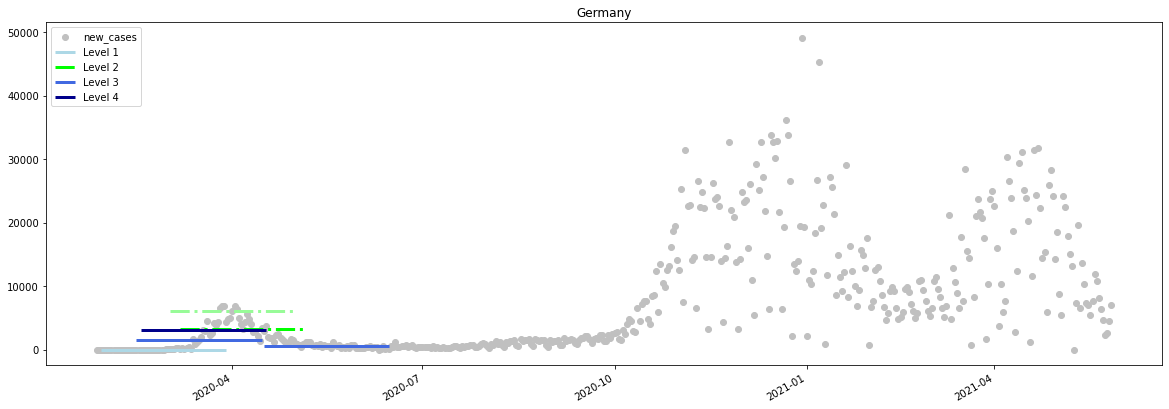

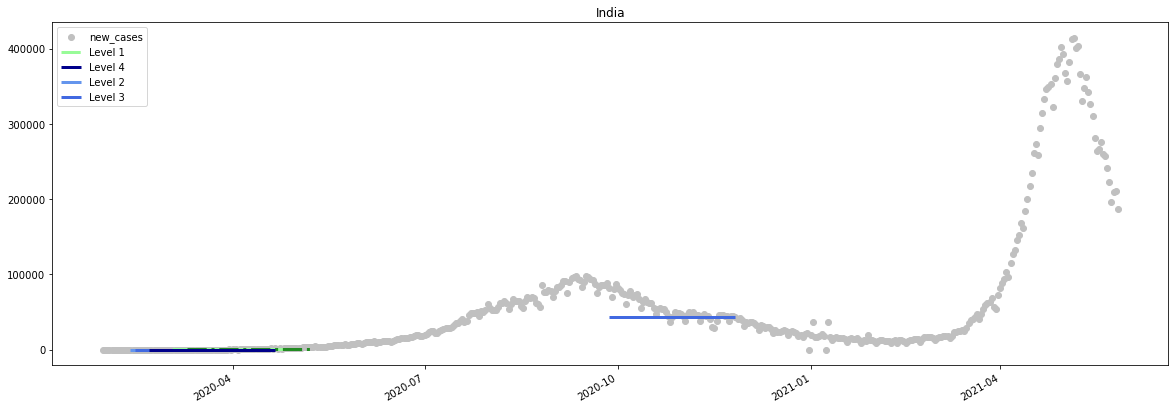

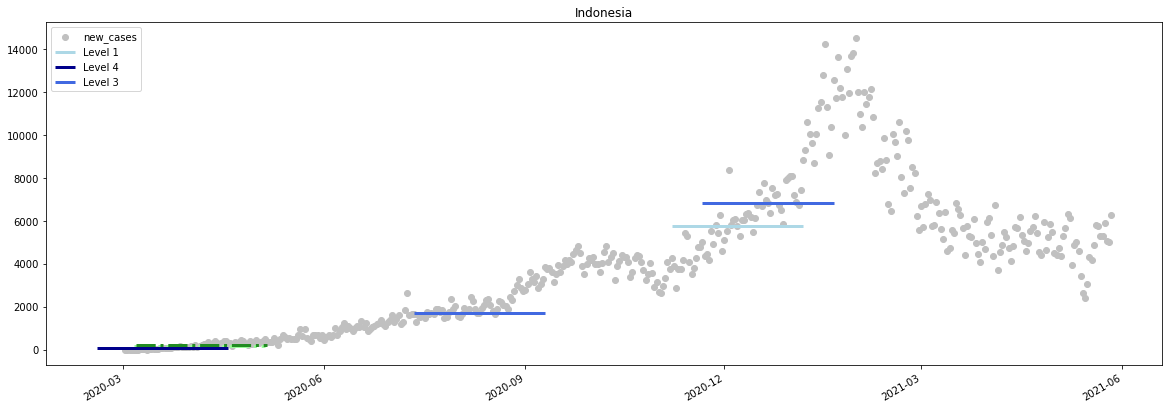

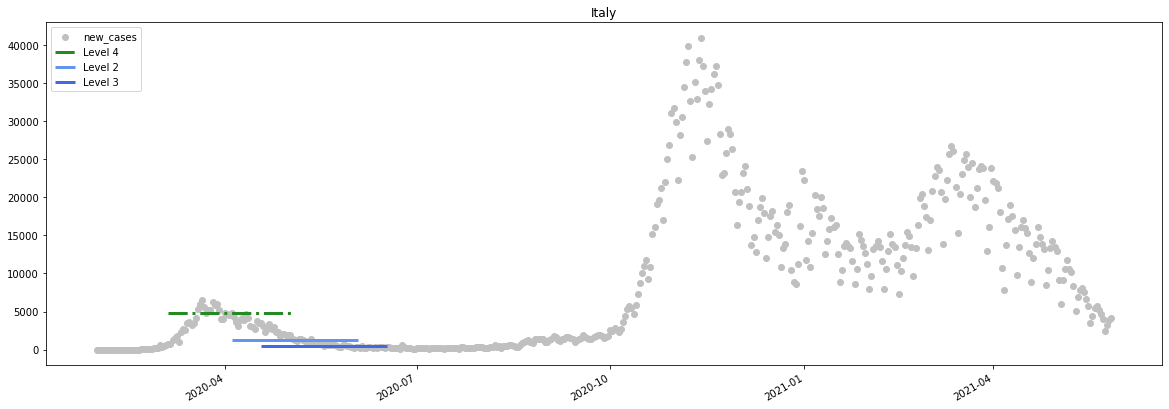

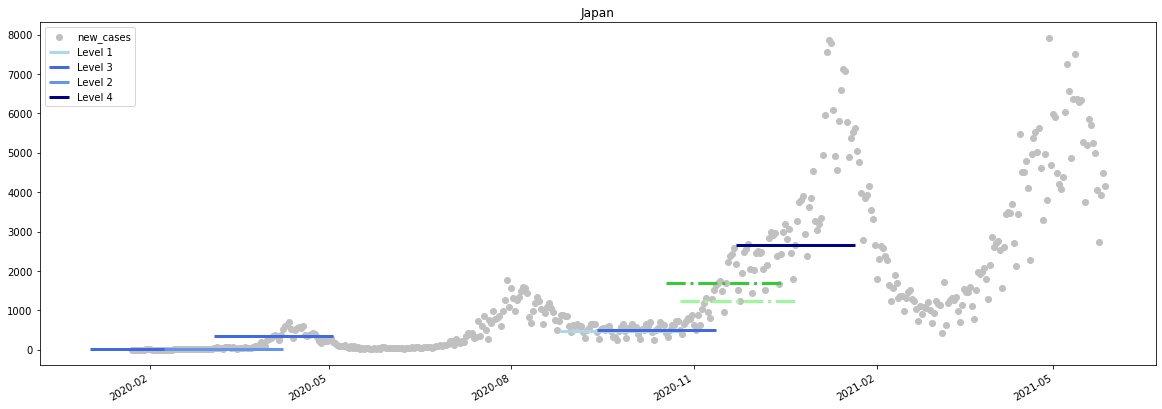

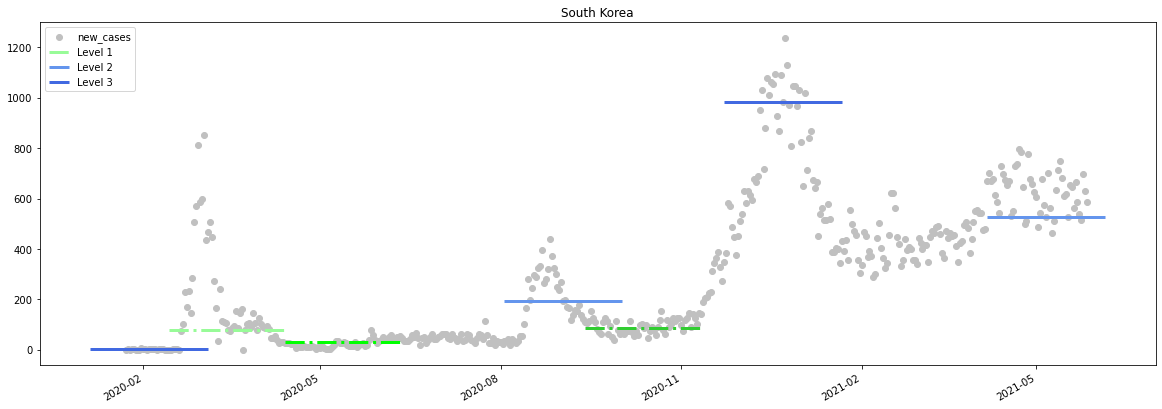

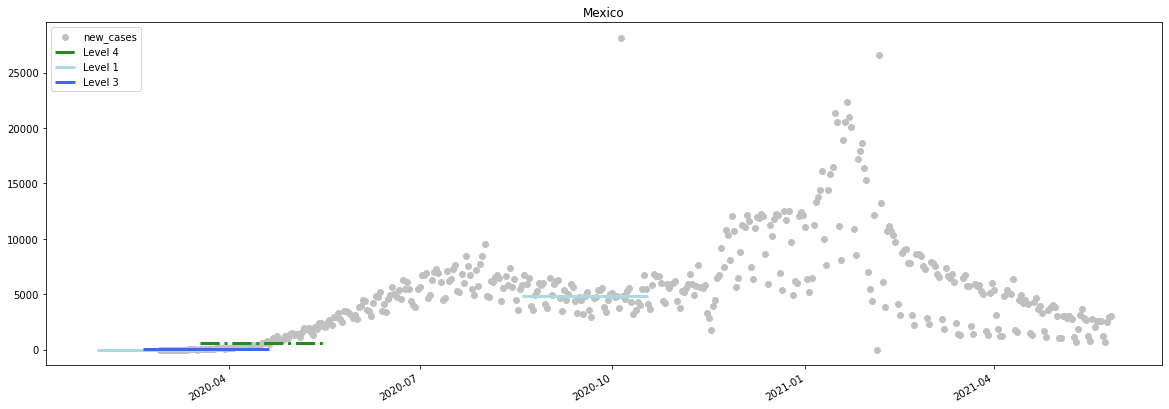

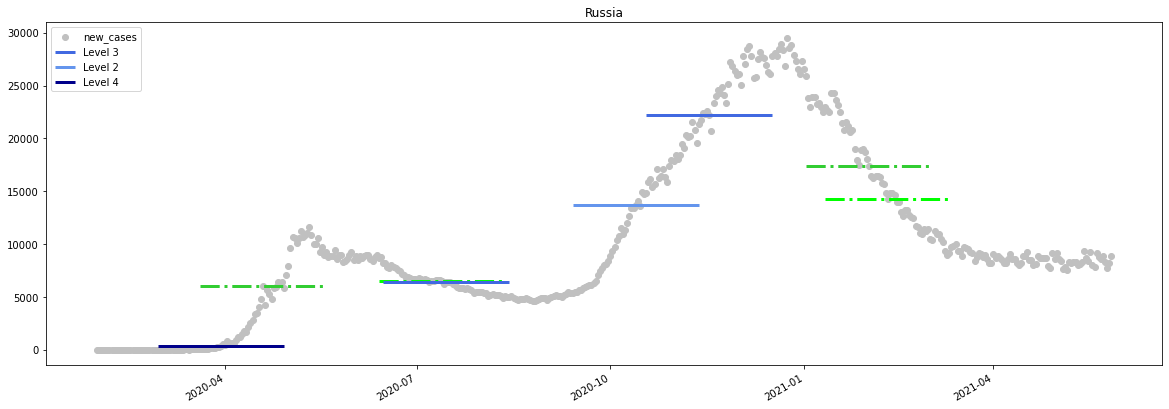

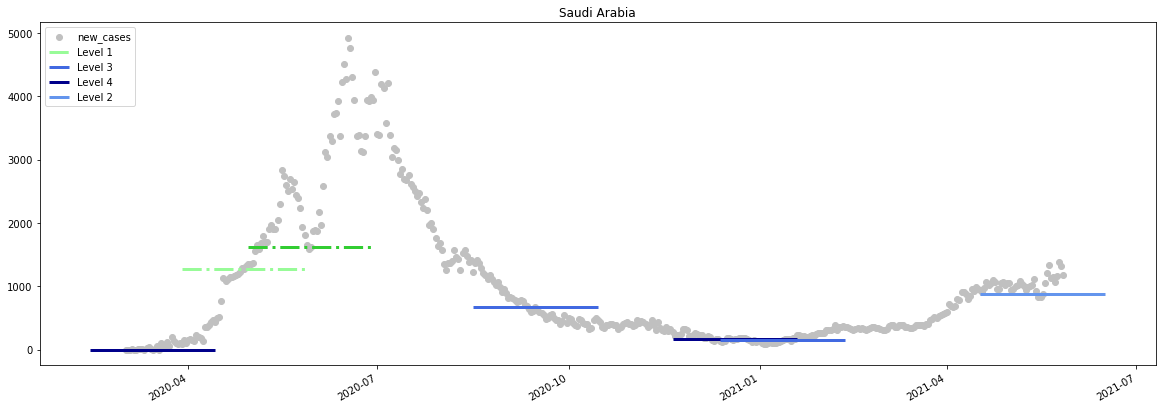

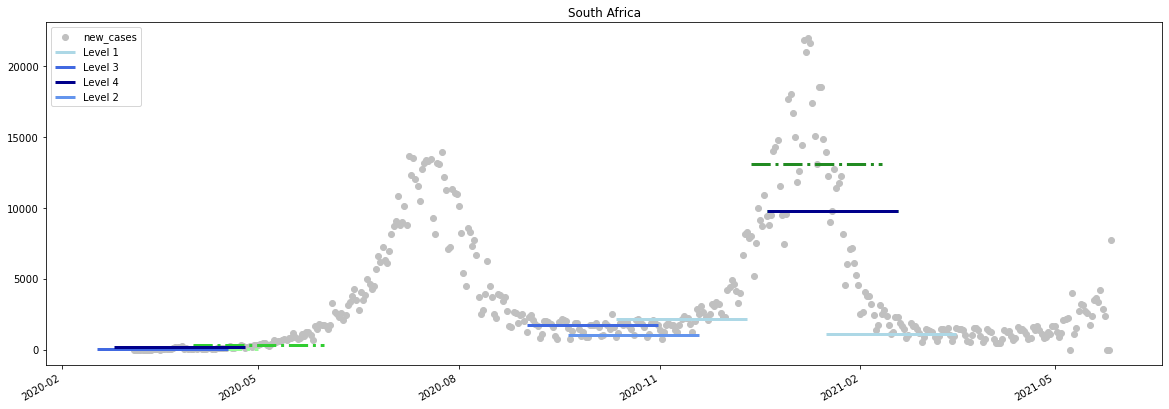

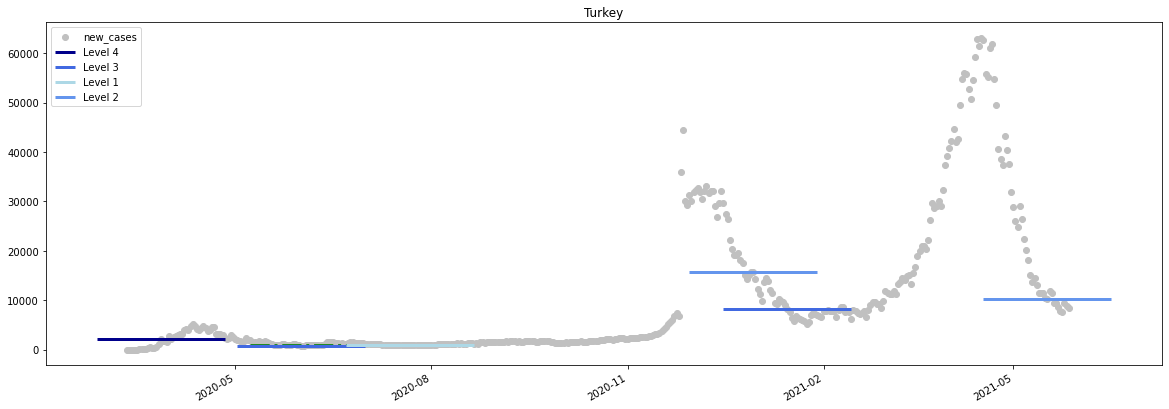

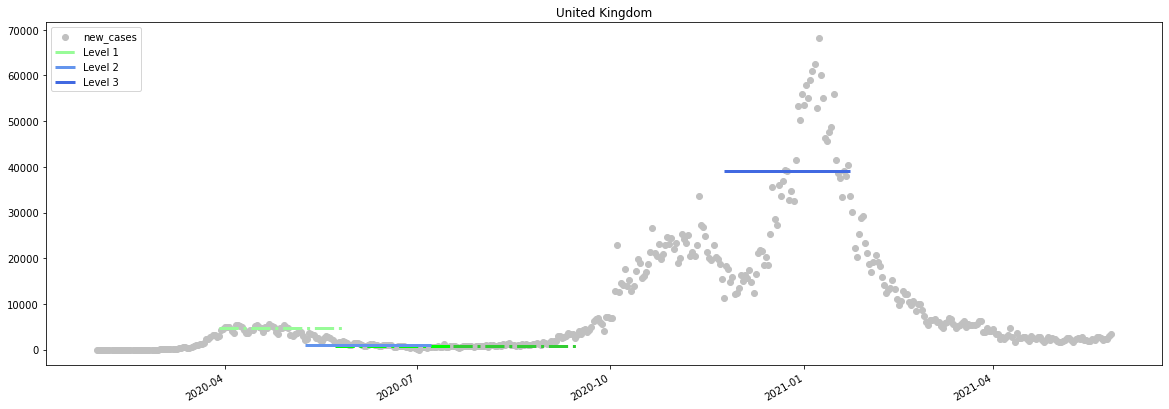

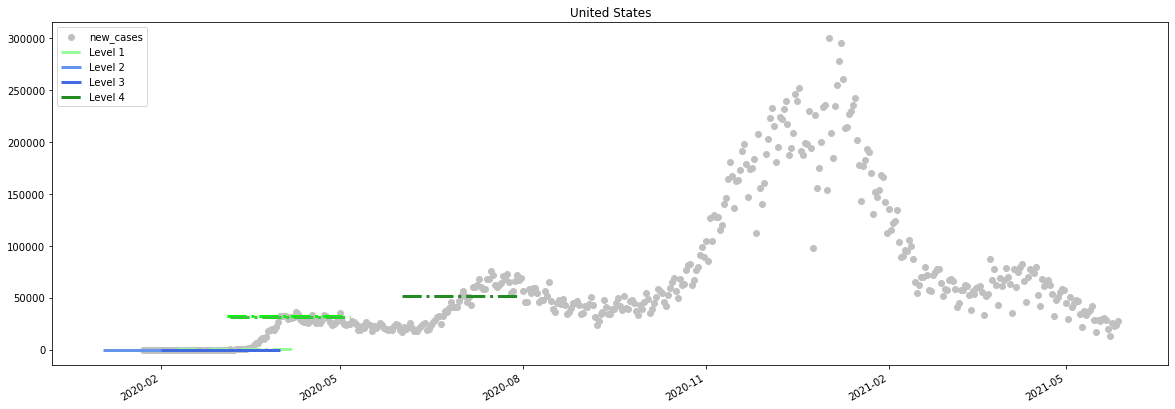

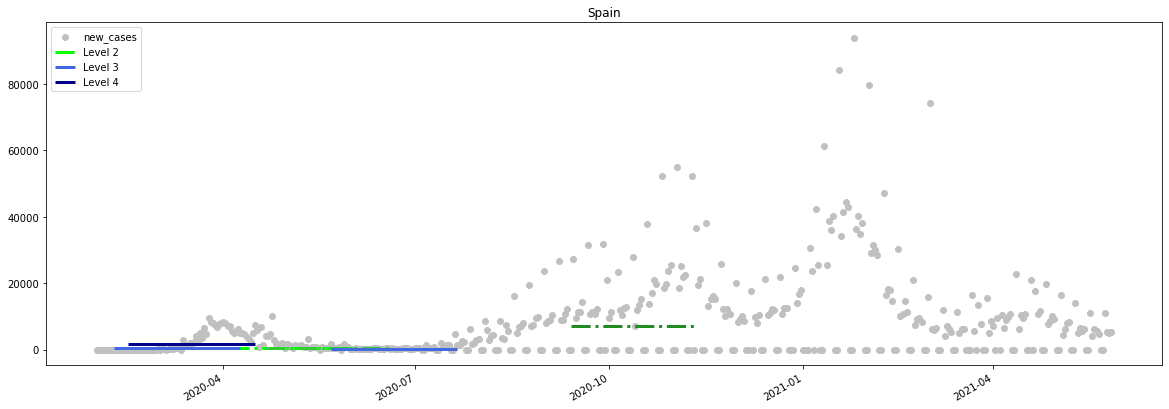

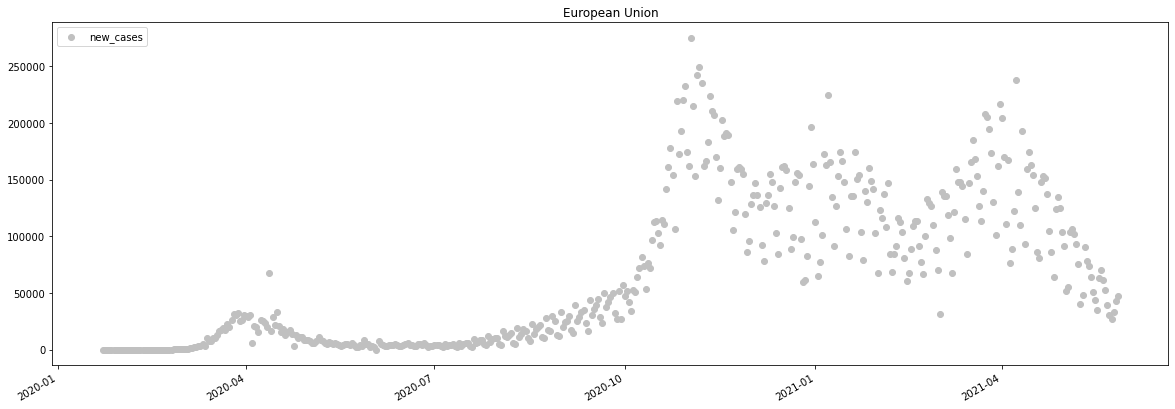

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import OrderedDict
from datetime import timedelta
#plot each countries in g20
for loc in g20_members:
    
    #TODO: same for other policies
    
    
    loc_data = g20_data[g20_data["location"]==loc]
    phase = face_cover_phases[face_cover_phases["country"]==loc]
    
    
    phase_travel = travel_phases[travel_phases["country"] == loc]
    
    
    #make sure date is in datetime format
     loc_data["date"] = pd.to_datetime( loc_data["date"], yearfirst=True)
     loc_data["month"] =  loc_data.date.dt.month_name()
     loc_data["year"] =  loc_data.date.dt.year
     loc_data["day"] =  loc_data.date.dt.day
    
    #TODO: remove negative numbers
    #negative to positive
    #negative to nan
    loc_data["new_cases"] = loc_data["new_cases"].map(lambda x: float("nan") if (x<0 or x==0) else x, na_action="ignore")
    
    
    #merge mask phases with num of cases
    final_mask = phase.merge( loc_data, on="date")
    final_mask = final_mask.drop(["location"],axis=1)
    #final_mask = [country  date  level_changes  new_cases  month  year  day]
    
    #merge travel phases with num of cases
    final_travel = phase_travel.merge( loc_data, on="date")
    final_travel = final_travel.drop(["location"],axis=1)
    
    #merge vacc
    final_vacc = phases.merge(loc_data, on="date")
    final_vacc = final_vacc.drop(["location"],axis=1)

    #TODO: merge other policies with num of cases
    
    
    #basic plot
    
    fig, ax = plt.subplots(figsize=(20,7))
    ax.scatter("date", "new_cases", data =  loc_data, color="silver")
    fmt_every_month = mdates.MonthLocator(interval=3)
    ax.xaxis.set_major_locator(fmt_every_month)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    fig.autofmt_xdate()
    plt.title(loc)
    
    
    
    #plot h-lines for MASK
    mask_colors = ["palegreen", "lime", "limegreen", "forestgreen"]
    for ind, data in final_mask.iterrows():
        plt.hlines(data[3], xmin=data[1]-timedelta(30), xmax =data[1]+timedelta(30), colors = mask_colors[int(data[2])-1],
                   label = f"Level {int(data[2])}", linestyles="dashdot", linewidth=3)
    
    
    #plot h-lines for TRAVEL
    
    travel_colors = ["lightblue","cornflowerblue","royalblue","darkblue" ]
    for ind, data in final_travel.iterrows():
        plt.hlines(data[3], xmin=data[1]-timedelta(30), xmax =data[1]+timedelta(30), colors = travel_colors[int(data[2])-1],
                   label = f"Level {int(data[2])}", linestyles="solid", linewidth=3)
    
    
    #plt h-lines for VACC
    vacc_colors = ["peachpuff", "salmon", "tomato", "orangered", "firebrick"]
    for ind, data in final_vacc.iterrows():
        plt.hlines(data[3], xmin=data[1]-timedelta(30), xmax =data[1]+timedelta(30), colors = vacc_colors[int(data[2])-1],
                   label = f"Level {int(data[2])}", linestyles="dashdot", linewidth=3)

    #TODO: plot h-lines for other policies
    
    
    
    
    
    
    
    
    #plot everything
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),loc="upper left")
    plt.show()
    

    